# Tarea 1 - Reconocimiento de Patrones 2024

**Elaborado por:** Scarlett Magdaleno Gatica

## Problema 7

Bajo el modelo Gaussiano, la función discriminante para el iésimo clasificador es:

$ g_i(x) = -\frac{1}{2}(x - \mu_i)^t \Sigma^{-1}_i (x - \mu_i) + \ln P(\omega_i) $

Un clasificador Euclideano simplemente sacaría la distancia a la media correspondiente:

$ g_i(x) = (x - \mu_i)^t (x - \mu_i) $

y escoge la clase que tenga menor distancia (la más cercana). Un clasificador que usa la distancia de Mahalanobis, evalúa:

$ g_i(x) = (x - \mu_i)^t \Sigma^{-1}_i (x - \mu_i) $

y también selecciona la clase con menor distancia.

### **a)** 
Generar un conjunto de datos $ D_1 $ de 1000 vectores bi-dimensionales que provienen de tres clases equiprobables modeladas por normales con vectores de medias:

$ \mu_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $
$ \mu_2 = \begin{bmatrix} 12 \\ 8 \end{bmatrix} $
$ \mu_3 = \begin{bmatrix} 16 \\ 1 \end{bmatrix} $

y matrices covarianzas:

$ S_1 = S_2 = S_3 = 4I $

donde \(I\) es la matriz identidad de $ 2 \times 2 $.


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import math

# Función para generar datos
def generate_data(mu1, mu2, mu3, covariance_matrix, seed=24):
    
    # Semilla para reproducibilidad
    np.random.seed(seed)
    
    # Número de muestras para cada clase (1000/3)
    num_samples = math.floor(1000/3)

    # Genera datos para la clase 1 (1000/3 + 1) 
    class1_data = multivariate_normal.rvs(mean=mu1, cov=covariance_matrix, size=num_samples+1)
    class1_df = pd.DataFrame(class1_data, columns=['x1', 'x2'])
    class1_df['label'] = 1

    # Genera datos para la clase 2 (1000/3)
    class2_data = multivariate_normal.rvs(mean=mu2, cov=covariance_matrix, size=num_samples)
    class2_df = pd.DataFrame(class2_data, columns=['x1', 'x2'])
    class2_df['label'] = 2

    # Genera datos para la clase 3 (1000/3)
    class3_data = multivariate_normal.rvs(mean=mu3, cov=covariance_matrix, size=num_samples)
    class3_df = pd.DataFrame(class3_data, columns=['x1', 'x2'])
    class3_df['label'] = 3

    # Concatena todos los datos (1000)
    D = pd.concat([class1_df, class2_df, class3_df], ignore_index=True)
    
    return D


# Medias de las clases
mu1 = np.array([1, 1])
mu2 = np.array([12, 8])
mu3 = np.array([16, 1])

# Matrices de covarianza
covariance_matrix = 4 * np.eye(2)  # Matriz identidad de tamaño 2x2 multiplicada por 4

# Generar el conjunto de datos D1
D1 = generate_data(mu1, mu2, mu3, covariance_matrix)

display(D1)

,x1,x2,label
0,3.658424,-0.540067,1
1,0.367439,-0.981621,1
2,-1.141633,-1.877427,1
3,2.128834,1.591444,1
4,-2.252808,1.439130,1
...,...,...,...
995,15.487247,3.283267,3
996,17.190570,-1.219196,3
997,19.101516,0.280277,3
998,13.274657,-0.227071,3


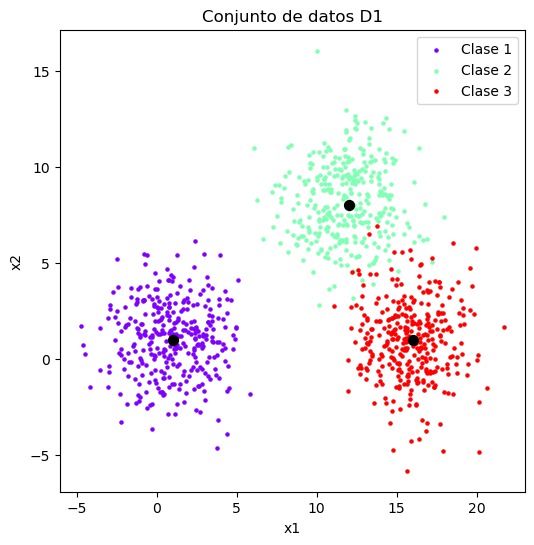

In [2]:
import matplotlib.pyplot as plt

def visualize_dataset(D, mu1, mu2, mu3, titulo=''):

    x1 = D['x1']
    x2 = D['x2']
    labels = D['label']
    
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    plt.figure(figsize=(6, 6))
    for label, color in zip(unique_labels, colors):
        indices = labels == label
        plt.scatter(x1[indices], x2[indices], s=5, label=f'Clase {int(label)}', color=color)
    
    # Graficar las medias de cada clase
    plt.scatter(mu1[0], mu1[1], s=50, c='black', marker='o')
    plt.scatter(mu2[0], mu2[1], s=50, c='black', marker='o')
    plt.scatter(mu3[0], mu3[1], s=50, c='black', marker='o')
    
    plt.title(titulo)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(False)
    plt.show()
    return

# Graficar los datos
visualize_dataset(D1, mu1, mu2, mu3, 'Conjunto de datos D1')

#### **a.i)** 
Aplicar los clasificadores Bayesiano (con estimación Máxima Verosimilitud), Euclideano y por distancia Mahalanobis a $ D_1 $.

In [3]:
# Definamos funciones para aplicar los tres clasificadores

# Clasificador Bayesiano
def bayesian_classifier(x, mu1, mu2, mu3, covariance_matrix):
    
    prior = 1/3
    g_i = []
    
    # Utilizando la función discriminante Gaussiana para cada clase
    g_i.append(-0.5 * np.dot(np.dot((x - mu1).T, np.linalg.inv(covariance_matrix)), (x - mu1)) + np.log(prior))
    g_i.append(-0.5 * np.dot(np.dot((x - mu2).T, np.linalg.inv(covariance_matrix)), (x - mu2)) + np.log(prior))
    g_i.append(-0.5 * np.dot(np.dot((x - mu3).T, np.linalg.inv(covariance_matrix)), (x - mu3)) + np.log(prior))
    
    return np.argmax(g_i) + 1 # Devuelve la clase correspondiente


# Clasificador Euclidiano
def euclidean_classifier(x, mu1, mu2, mu3):
    
    euclidean_distances = []
    
    euclidean_distances.append(np.linalg.norm(x - mu1))
    euclidean_distances.append(np.linalg.norm(x - mu2))
    euclidean_distances.append(np.linalg.norm(x - mu3))

    return np.argmin(euclidean_distances) + 1 # Devuelve la clase correspondiente

# Clasificador por distancia de Mahalanobis
def mahalanobis_classifier(x, mu1, mu2, mu3, covariance_matrix):
    
    mahalanobis_distances = []
    
    mahalanobis_distances.append(np.dot(np.dot((x - mu1).T, np.linalg.inv(covariance_matrix)), (x - mu1)))
    mahalanobis_distances.append(np.dot(np.dot((x - mu2).T, np.linalg.inv(covariance_matrix)), (x - mu2)))
    mahalanobis_distances.append(np.dot(np.dot((x - mu3).T, np.linalg.inv(covariance_matrix)), (x - mu3)))
    
    return np.argmin(mahalanobis_distances) + 1 # Devuelve la clase correspondiente

# Función para aplicar clasificadores a los datos
def apply_classifiers(D, mu1, mu2, mu3, covariance_matrix):

    D['Bayesian_Classifier'] = D[['x1', 'x2']].apply(lambda x: bayesian_classifier(x, mu1, mu2, mu3, covariance_matrix), axis=1)
    D['Euclidean_Classifier'] = D[['x1', 'x2']].apply(lambda x: euclidean_classifier(x, mu1, mu2, mu3), axis=1)
    D['Mahalanobis_Classifier'] = D[['x1', 'x2']].apply(lambda x: mahalanobis_classifier(x, mu1, mu2, mu3, covariance_matrix), axis=1)

    
# Aplicar los clasificadores a los datos D1   
apply_classifiers(D1, mu1, mu2, mu3, covariance_matrix)

display(D1)

,x1,x2,label,Bayesian_Classifier,Euclidean_Classifier,Mahalanobis_Classifier
0,3.658424,-0.540067,1,1,1,1
1,0.367439,-0.981621,1,1,1,1
2,-1.141633,-1.877427,1,1,1,1
3,2.128834,1.591444,1,1,1,1
4,-2.252808,1.439130,1,1,1,1
...,...,...,...,...,...,...
995,15.487247,3.283267,3,3,3,3
996,17.190570,-1.219196,3,3,3,3
997,19.101516,0.280277,3,3,3,3
998,13.274657,-0.227071,3,3,3,3


#### **a.ii)** 
Calcular el error de clasificación para cada clasificador.

In [4]:
from sklearn.metrics import confusion_matrix

# Función para calcular el error de clasificación
def classification_error(true_labels, predicted_labels):
    incorrect_predictions = (true_labels != predicted_labels).sum()
    total_samples = len(true_labels)
    error_rate = incorrect_predictions / total_samples
    return error_rate

def classifier_evaluation(D):
    # Calcular el error de clasificación para cada clasificador usando el DataFrame D
    bayesian_error = classification_error(D['label'], D['Bayesian_Classifier'])
    euclidean_error = classification_error(D['label'], D['Euclidean_Classifier'])
    mahalanobis_error = classification_error(D['label'], D['Mahalanobis_Classifier'])

    # Calcular matrices de confusión para cada clasificador
    bayesian_confusion_matrix = confusion_matrix(D['label'], D['Bayesian_Classifier'])
    euclidean_confusion_matrix = confusion_matrix(D['label'], D['Euclidean_Classifier'])
    mahalanobis_confusion_matrix = confusion_matrix(D['label'], D['Mahalanobis_Classifier'])

    print("\nError de clasificación del clasificador bayesiano:", bayesian_error)
    print("Matriz de confusión del clasificador bayesiano:")
    print(bayesian_confusion_matrix)

    print("\nError de clasificación del clasificador euclidiano:", euclidean_error)
    print("Matriz de confusión del clasificador euclidiano:")
    print(euclidean_confusion_matrix)

    print("\nError de clasificación del clasificador de Mahalanobis:", mahalanobis_error)
    print("Matriz de confusión del clasificador de Mahalanobis:")
    print(mahalanobis_confusion_matrix)
  
# Evaluar clasificadores del conjunto de datos D1
classifier_evaluation(D1)


Error de clasificación del clasificador bayesiano: 0.014
Matriz de confusión del clasificador bayesiano:
[[334   0   0]
 [  0 329   4]
 [  0  10 323]]

Error de clasificación del clasificador euclidiano: 0.014
Matriz de confusión del clasificador euclidiano:
[[334   0   0]
 [  0 329   4]
 [  0  10 323]]

Error de clasificación del clasificador de Mahalanobis: 0.014
Matriz de confusión del clasificador de Mahalanobis:
[[334   0   0]
 [  0 329   4]
 [  0  10 323]]


### **b)** 
Generar un conjunto de datos $ D_2 $ de 1000 vectores bi-dimensionales que provienen de tres clases equiprobables modeladas por normales con vectores de medias:

$ \mu_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $
$ \mu_2 = \begin{bmatrix} 14 \\ 7 \end{bmatrix} $
$ \mu_3 = \begin{bmatrix} 16 \\ 1 \end{bmatrix} $

y matrices covarianzas:

$ S_1 = S_2 = S_3 = \begin{bmatrix} 5 & 3 \\ 3 & 4 \end{bmatrix} $

In [5]:
# Medias de las clases
mu1 = np.array([1, 1])
mu2 = np.array([14, 7])
mu3 = np.array([16, 1])

# Matrices de covarianza 
covariance_matrix = 4 * np.array([[5, 3], [3, 4]])  

# Generar el conjunto de datos D2
D2 = generate_data(mu1, mu2, mu3, covariance_matrix)

display(D2)

,x1,x2,label
0,-3.368140,-5.138038,1
1,3.872399,0.296713,1
2,7.733777,2.149880,1
3,-1.827037,-0.458703,1
4,7.473041,7.178558,1
...,...,...,...
995,15.291981,4.014247,3
996,15.237723,-3.158361,3
997,10.063018,-5.168579,3
998,22.668522,4.706837,3


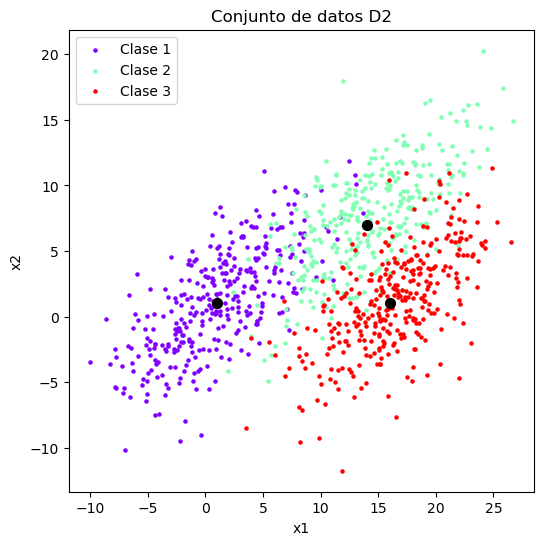

In [6]:
# Graficar los datos
visualize_dataset(D2, mu1, mu2, mu3, 'Conjunto de datos D2')

#### **b.i)** 
Aplicar los clasificadores Bayesiano (con estimación Máxima Verosimilitud), Euclideano y por distancia Mahalanobis a $ D_2 $.

In [7]:
apply_classifiers(D2, mu1, mu2, mu3, covariance_matrix)

display(D2)

,x1,x2,label,Bayesian_Classifier,Euclidean_Classifier,Mahalanobis_Classifier
0,-3.368140,-5.138038,1,1,1,1
1,3.872399,0.296713,1,1,1,1
2,7.733777,2.149880,1,2,1,2
3,-1.827037,-0.458703,1,1,1,1
4,7.473041,7.178558,1,1,2,1
...,...,...,...,...,...,...
995,15.291981,4.014247,3,3,3,3
996,15.237723,-3.158361,3,3,3,3
997,10.063018,-5.168579,3,3,3,3
998,22.668522,4.706837,3,3,3,3


#### **b.ii)** 
Calcular el error de clasificación para cada clasificador.

In [8]:
classifier_evaluation(D2)


Error de clasificación del clasificador bayesiano: 0.11
Matriz de confusión del clasificador bayesiano:
[[306  28   0]
 [ 18 285  30]
 [  2  32 299]]

Error de clasificación del clasificador euclidiano: 0.149
Matriz de confusión del clasificador euclidiano:
[[298  36   0]
 [ 23 280  30]
 [ 14  46 273]]

Error de clasificación del clasificador de Mahalanobis: 0.11
Matriz de confusión del clasificador de Mahalanobis:
[[306  28   0]
 [ 18 285  30]
 [  2  32 299]]


### **c)** 
Generar un conjunto de datos $ D_3 $ de 1000 vectores bi-dimensionales que provienen de tres clases equiprobables modeladas por normales con vectores de medias:

$ \mu_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $
$ \mu_2 = \begin{bmatrix} 8 \\ 6 \end{bmatrix} $
$ \mu_3 = \begin{bmatrix} 13 \\ 1 \end{bmatrix} $

y matrices covarianzas:

$ S_1 = S_2 = S_3 = 6I $

donde \(I\) es la matriz identidad de $ 2 \times 2 $. 


In [9]:
# Medias de las clases
mu1 = np.array([1, 1])
mu2 = np.array([8, 6])
mu3 = np.array([13, 1])

# Matrices de covarianza (matriz identidad en este caso)
covariance_matrix = 6 * np.eye(2)  # Matriz identidad de tamaño 2x2 multiplicada por 6

# Generar el conjunto de datos D3
D3 = generate_data(mu1, mu2, mu3, covariance_matrix)

display(D3)

,x1,x2,label
0,4.255892,-0.886189,1
1,0.225275,-1.426980,1
2,-1.622953,-2.524113,1
3,2.382533,1.724368,1
4,-2.983860,1.537823,1
...,...,...,...
995,12.372008,3.796420,3
996,14.458145,-1.717948,3
997,16.798565,0.118523,3
998,9.662150,-0.502849,3


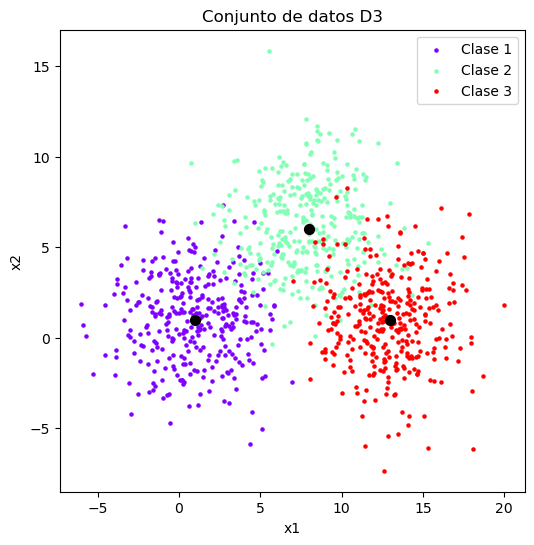

In [10]:
# Graficar los datos
visualize_dataset(D3, mu1, mu2, mu3, 'Conjunto de datos D3')

#### **c.i)** 
Aplicar los clasificadores Bayesiano (con estimación Máxima Verosimilitud), Euclideano y por distancia Mahalanobis a $ D_3 $.

In [11]:
apply_classifiers(D3, mu1, mu2, mu3, covariance_matrix)

display(D3)

,x1,x2,label,Bayesian_Classifier,Euclidean_Classifier,Mahalanobis_Classifier
0,4.255892,-0.886189,1,1,1,1
1,0.225275,-1.426980,1,1,1,1
2,-1.622953,-2.524113,1,1,1,1
3,2.382533,1.724368,1,1,1,1
4,-2.983860,1.537823,1,1,1,1
...,...,...,...,...,...,...
995,12.372008,3.796420,3,3,3,3
996,14.458145,-1.717948,3,3,3,3
997,16.798565,0.118523,3,3,3,3
998,9.662150,-0.502849,3,3,3,3


#### **c.ii)** 
Calcular el error de clasificación para cada clasificador.

In [12]:
classifier_evaluation(D3)


Error de clasificación del clasificador bayesiano: 0.077
Matriz de confusión del clasificador bayesiano:
[[321  13   0]
 [ 16 293  24]
 [  0  24 309]]

Error de clasificación del clasificador euclidiano: 0.077
Matriz de confusión del clasificador euclidiano:
[[321  13   0]
 [ 16 293  24]
 [  0  24 309]]

Error de clasificación del clasificador de Mahalanobis: 0.077
Matriz de confusión del clasificador de Mahalanobis:
[[321  13   0]
 [ 16 293  24]
 [  0  24 309]]


### **d)** 
Generar un conjunto de datos $ D_4 $ de 1000 vectores bi-dimensionales que provienen de tres clases equiprobables modeladas por normales con vectores de medias:

$ \mu_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $
$ \mu_2 = \begin{bmatrix} 10 \\ 5 \end{bmatrix} $
$ \mu_3 = \begin{bmatrix} 11 \\ 1 \end{bmatrix} $

y matrices covarianzas:

$ S_1 = S_2 = S_3 = \begin{bmatrix} 7 & 4 \\ 4 & 5 \end{bmatrix} $


In [13]:
# Medias de las clases
mu1 = np.array([1, 1])
mu2 = np.array([10, 5])
mu3 = np.array([11, 1])

# Matrices de covarianza 
covariance_matrix = 4 * np.array([[7, 4], [4, 5]])  

# Generar el conjunto de datos D4
D4 = generate_data(mu1, mu2, mu3, covariance_matrix)

display(D4)

,x1,x2,label
0,-4.368398,-5.868344,1
1,4.257079,0.098750,1
2,8.796825,2.086256,1
3,-2.329566,-0.571644,1
4,8.787220,7.843341,1
...,...,...,...
995,10.360839,4.469557,3
996,9.885299,-3.727567,3
997,3.828766,-5.850097,3
998,18.869230,5.011308,3


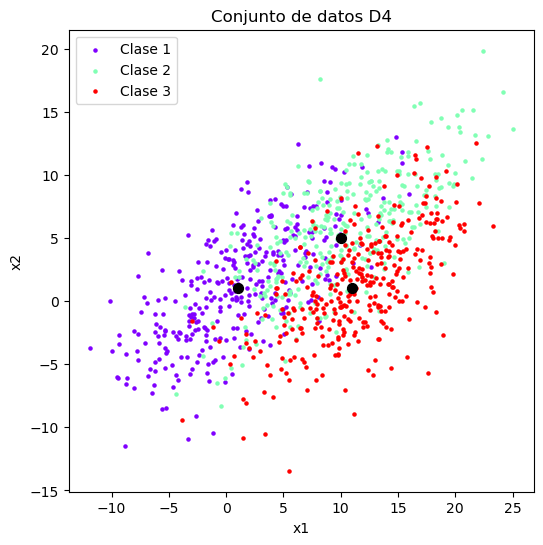

In [14]:
# Graficar los datos
visualize_dataset(D4, mu1, mu2, mu3, 'Conjunto de datos D4')

#### **d.i)** 
Aplicar los clasificadores Bayesiano (con estimación Máxima Verosimilitud), Euclideano y por distancia Mahalanobis a $ D_4 $.

In [15]:
apply_classifiers(D4, mu1, mu2, mu3, covariance_matrix)

display(D4)

,x1,x2,label,Bayesian_Classifier,Euclidean_Classifier,Mahalanobis_Classifier
0,-4.368398,-5.868344,1,1,1,1
1,4.257079,0.098750,1,1,1,1
2,8.796825,2.086256,1,2,3,2
3,-2.329566,-0.571644,1,1,1,1
4,8.787220,7.843341,1,2,2,2
...,...,...,...,...,...,...
995,10.360839,4.469557,3,2,2,2
996,9.885299,-3.727567,3,3,3,3
997,3.828766,-5.850097,3,3,1,3
998,18.869230,5.011308,3,3,3,3


#### **d.ii)** 
Calcular el error de clasificación para cada clasificador.

In [16]:
classifier_evaluation(D4)


Error de clasificación del clasificador bayesiano: 0.289
Matriz de confusión del clasificador bayesiano:
[[263  55  16]
 [ 72 194  67]
 [ 19  60 254]]

Error de clasificación del clasificador euclidiano: 0.33
Matriz de confusión del clasificador euclidiano:
[[254  68  12]
 [ 64 227  42]
 [ 49  95 189]]

Error de clasificación del clasificador de Mahalanobis: 0.289
Matriz de confusión del clasificador de Mahalanobis:
[[263  55  16]
 [ 72 194  67]
 [ 19  60 254]]


### **e)** Estudiar los resultados de los experimentos anteriores y exponer sus conclusiones.

En los resultados, observamos que para los conjuntos de datos de los incisos a) y c), se obtiene el mismo error de clasificación para los tres clasificadores (bayesiano, euclidiano y de Mahalanobis). Además, estos dos presentaron los errores más bajos de los cuatro conjuntos de datos. Visualizando los datos, notamos que, dado que la covarianza es un múltiplo de la identidad, los conjuntos de datos tienden a formar un círculo, cuyo radio es aproximadamente el coeficiente por el cual se multiplica la matriz identidad. En el primer conjunto de datos, la dispersión es menor, ya que la matriz identidad en la matriz de covarianza se multiplica por un coeficiente menor (4) en comparación con el conjunto de datos D3 (6). Como consecuencia, en el caso de D1, las clases son más separables, dado que la intersección entre las clases 2 y 3 es pequeña, y la intersección de estas dos clases con la clase 1 es nula. Por otro lado, en el conjunto de datos D3, cuya matriz de covarianza es la identidad multiplicada por 6, observamos una mayor dispersión, lo que incrementa la intersección entre los conjuntos. Aunque siguen siendo separables, estas intersecciones aumentan notablemente el error de clasificación, lo cual se refleja en el error de 7.7% en todos los clasificadores de D3, comparado con el 1.4% de D1 en los tres clasificadores.

Analizando ahora los resultados de los incisos b) y c), cuyas matrices de covarianza no son diagonales, observamos que el error de clasificación aumenta en general para los tres clasificadores. En particular, notamos que los clasificadores bayesiano y de Mahalanobis presentan los mismos resultados para el conjunto de datos D2, ambos con un 11%, y de manera similar, para D4, obtenemos un error de 28.9% en ambos clasificadores. Además, se observa un patrón donde el clasificador euclidiano presentó un mayor error, siendo de 14.9% para D2 y 33% para D4.

Respecto a las matrices de covarianza, el hecho de que los errores para D4 sean mayores que los de D2 puede atribuirse a que la matriz de covarianza de D4 tiene elementos más grandes que la de D2, lo que implica una mayor dispersión en D4. Esto se observa en las gráficas de los conjuntos de datos, donde se ve que en D2, las clases tienen una menor intersección que en D4, lo cual implica que D2 es más fácil de separar, es decir, de clasificar, y por ende, tiene un menor error.

El hecho de que los clasificadores bayesiano y de Mahalanobis tengan un menor error que el euclidiano se debe a que estos dos consideran la distribución de los datos, mientras que el euclidiano solo toma en cuenta la distancia de los datos a la media. Por ende, los clasificadores bayesiano y de Mahalanobis pueden separar mejor las clases al conocer la distribución de los datos.

En general, D2 y D4 son más difíciles de clasificar que D1 y D3, dado que los primeros presentan una mayor intersección entre clases. Asimismo, las matrices de covarianza de D2 y D4 son más complejas que las de D1 y D3.

En conclusión, podemos observar cómo la estructura de los datos, dada por las medias y covarianzas, así como los métodos de clasificación, influyen en los resultados de la clasificación.